In [1]:
import urllib.request 
import json 
import pandas as pd 
from pandas.io.json import json_normalize

In [2]:
url = "http://openapi.seoul.go.kr:8088/4a514a446c62696b313132665a4c436c/json/CardSubwayStatsNew/1/1000/20220301"

In [3]:
response = urllib.request.urlopen("http://openapi.seoul.go.kr:8088/4a514a446c62696b313132665a4c436c/json/CardSubwayStatsNew/1/1000/20220301") 
json_str = response.read().decode("utf-8")

In [4]:
json_object = json.loads(json_str)

In [5]:
json_object

{'CardSubwayStatsNew': {'list_total_count': 593,
  'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'row': [{'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '서울역',
    'RIDE_PASGR_NUM': 20994.0,
    'ALIGHT_PASGR_NUM': 19468.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '시청',
    'RIDE_PASGR_NUM': 12439.0,
    'ALIGHT_PASGR_NUM': 12379.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '종각',
    'RIDE_PASGR_NUM': 15750.0,
    'ALIGHT_PASGR_NUM': 13544.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '종로3가',
    'RIDE_PASGR_NUM': 16349.0,
    'ALIGHT_PASGR_NUM': 14533.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '종로5가',
    'RIDE_PASGR_NUM': 14036.0,
    'ALIGHT_PASGR_NUM': 13472.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'S

In [6]:
df=pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
df

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20220301,1호선,서울역,20994.0,19468.0,20220304
1,20220301,1호선,시청,12439.0,12379.0,20220304
2,20220301,1호선,종각,15750.0,13544.0,20220304
3,20220301,1호선,종로3가,16349.0,14533.0,20220304
4,20220301,1호선,종로5가,14036.0,13472.0,20220304
...,...,...,...,...,...,...
588,20220301,중앙선,오빈,189.0,176.0,20220304
589,20220301,중앙선,양평,1515.0,1442.0,20220304
590,20220301,중앙선,원덕,185.0,192.0,20220304
591,20220301,중앙선,용문,1286.0,1181.0,20220304


In [7]:
dt_index = pd.date_range(start='20220301', end='20220315')
dt_index

DatetimeIndex(['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12',
               '2022-03-13', '2022-03-14', '2022-03-15'],
              dtype='datetime64[ns]', freq='D')

In [8]:
dt_list = dt_index.strftime("%Y%m%d").tolist()
dt_list

['20220301',
 '20220302',
 '20220303',
 '20220304',
 '20220305',
 '20220306',
 '20220307',
 '20220308',
 '20220309',
 '20220310',
 '20220311',
 '20220312',
 '20220313',
 '20220314',
 '20220315']

In [9]:
dt_index = pd.date_range(start='20220301', end='20220315')
dt_list = dt_index.strftime("%Y%m%d").tolist()

for i in dt_list:
    url="http://openapi.seoul.go.kr:8088/4a514a446c62696b313132665a4c436c/json/CardSubwayStatsNew/1/1000/" + i
    response = urllib.request.urlopen(url) 
    json_str = response.read().decode("utf-8")
    json_object = json.loads(json_str)
    df_temp=pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
    df=df.append(df_temp)

In [10]:
df.columns = ['사용일자', '호선명', '역명', '승차총승객수', '하차총승객수', '등록일자']
df

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자
0,20220301,1호선,서울역,20994.0,19468.0,20220304
1,20220301,1호선,시청,12439.0,12379.0,20220304
2,20220301,1호선,종각,15750.0,13544.0,20220304
3,20220301,1호선,종로3가,16349.0,14533.0,20220304
4,20220301,1호선,종로5가,14036.0,13472.0,20220304
...,...,...,...,...,...,...
589,20220315,중앙선,오빈,296.0,294.0,20220318
590,20220315,중앙선,양평,2417.0,2473.0,20220318
591,20220315,중앙선,원덕,330.0,330.0,20220318
592,20220315,중앙선,용문,2820.0,2778.0,20220318


In [11]:
df = df.drop('등록일자', axis= 1)
df

,사용일자,호선명,역명,승차총승객수,하차총승객수
0,20220301,1호선,서울역,20994.0,19468.0
1,20220301,1호선,시청,12439.0,12379.0
2,20220301,1호선,종각,15750.0,13544.0
3,20220301,1호선,종로3가,16349.0,14533.0
4,20220301,1호선,종로5가,14036.0,13472.0
...,...,...,...,...,...
589,20220315,중앙선,오빈,296.0,294.0
590,20220315,중앙선,양평,2417.0,2473.0
591,20220315,중앙선,원덕,330.0,330.0
592,20220315,중앙선,용문,2820.0,2778.0


In [12]:
df['총합산승객수'] = df['승차총승객수'] + df['하차총승객수']
df

,사용일자,호선명,역명,승차총승객수,하차총승객수,총합산승객수
0,20220301,1호선,서울역,20994.0,19468.0,40462.0
1,20220301,1호선,시청,12439.0,12379.0,24818.0
2,20220301,1호선,종각,15750.0,13544.0,29294.0
3,20220301,1호선,종로3가,16349.0,14533.0,30882.0
4,20220301,1호선,종로5가,14036.0,13472.0,27508.0
...,...,...,...,...,...,...
589,20220315,중앙선,오빈,296.0,294.0,590.0
590,20220315,중앙선,양평,2417.0,2473.0,4890.0
591,20220315,중앙선,원덕,330.0,330.0,660.0
592,20220315,중앙선,용문,2820.0,2778.0,5598.0


In [13]:
filt = df['호선명'].str.contains('3호선')
df[filt]

,사용일자,호선명,역명,승차총승객수,하차총승객수,총합산승객수
60,20220301,3호선,지축,2155.0,2020.0,4175.0
61,20220301,3호선,구파발,9962.0,10251.0,20213.0
62,20220301,3호선,연신내,20147.0,19128.0,39275.0
63,20220301,3호선,불광,8945.0,10133.0,19078.0
64,20220301,3호선,녹번,6911.0,6395.0,13306.0
...,...,...,...,...,...,...
88,20220315,3호선,일원,9710.0,9432.0,19142.0
89,20220315,3호선,수서,14428.0,14827.0,29255.0
90,20220315,3호선,가락시장,8122.0,8003.0,16125.0
91,20220315,3호선,경찰병원,6642.0,6624.0,13266.0


In [14]:
df = df[filt]
df

,사용일자,호선명,역명,승차총승객수,하차총승객수,총합산승객수
60,20220301,3호선,지축,2155.0,2020.0,4175.0
61,20220301,3호선,구파발,9962.0,10251.0,20213.0
62,20220301,3호선,연신내,20147.0,19128.0,39275.0
63,20220301,3호선,불광,8945.0,10133.0,19078.0
64,20220301,3호선,녹번,6911.0,6395.0,13306.0
...,...,...,...,...,...,...
88,20220315,3호선,일원,9710.0,9432.0,19142.0
89,20220315,3호선,수서,14428.0,14827.0,29255.0
90,20220315,3호선,가락시장,8122.0,8003.0,16125.0
91,20220315,3호선,경찰병원,6642.0,6624.0,13266.0


In [15]:
df = df.loc[df['총합산승객수'] >= 40000][['역명','승차총승객수','하차총승객수', '총합산승객수']]
df

,역명,승차총승객수,하차총승객수,총합산승객수
79,고속터미널,30301.0,28148.0,58449.0
79,고속터미널,30301.0,28148.0,58449.0
62,연신내,34463.0,32621.0,67084.0
76,압구정,28872.0,30530.0,59402.0
77,신사,27064.0,27942.0,55006.0
...,...,...,...,...
76,압구정,28304.0,30001.0,58305.0
77,신사,26726.0,27835.0,54561.0
79,고속터미널,31037.0,29692.0,60729.0
81,남부터미널(예술의전당),24776.0,25471.0,50247.0


In [16]:
df = df.sort_values(by=['총합산승객수'], ascending = False)
df

,역명,승차총승객수,하차총승객수,총합산승객수
79,고속터미널,39037.0,38442.0,77479.0
80,고속터미널,37793.0,38573.0,76366.0
83,양재(서초구청),36440.0,38376.0,74816.0
83,양재(서초구청),35984.0,38713.0,74697.0
79,고속터미널,37456.0,36942.0,74398.0
...,...,...,...,...
77,신사,23296.0,24126.0,47422.0
77,신사,22898.0,23606.0,46504.0
76,압구정,21519.0,22578.0,44097.0
76,압구정,21277.0,22630.0,43907.0


In [17]:
df = df.head(60)
df

,역명,승차총승객수,하차총승객수,총합산승객수
79,고속터미널,39037.0,38442.0,77479.0
80,고속터미널,37793.0,38573.0,76366.0
83,양재(서초구청),36440.0,38376.0,74816.0
83,양재(서초구청),35984.0,38713.0,74697.0
79,고속터미널,37456.0,36942.0,74398.0
80,고속터미널,36618.0,37533.0,74151.0
83,양재(서초구청),35588.0,38533.0,74121.0
83,양재(서초구청),36019.0,38067.0,74086.0
82,양재(서초구청),35259.0,38242.0,73501.0
82,양재(서초구청),34544.0,37650.0,72194.0


In [18]:
# 3호선 승하차승객수 Top4
# 1등: 고속터미널(77479)
# 2등: 양재(서초구청)(74816)
# 3등: 연신내(68225)
# 4등: 압구정(62943)

In [19]:
import matplotlib.pyplot as plt

In [20]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.size'] = 15 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

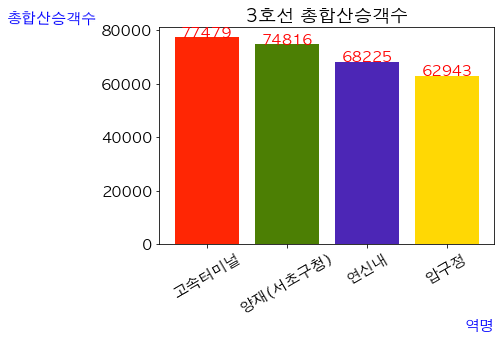

In [22]:
labels = ['고속터미널', '양재(서초구청)', '연신내', '압구정']
values = [77479, 74816, 68225, 62943]

bar = plt.bar(labels, values)
plt.title('3호선 총합산승객수')
plt.xticks(rotation = 30)
plt.bar(labels,values)
plt.xlabel('역명', color = 'blue',loc = 'right')
plt.ylabel('총합산승객수', color = 'blue',loc = 'top', rotation = -1)
colors = ['red', 'g','b','yellow']
plt.bar(labels,values,color = colors, alpha = 0.7)

for idx, rect in enumerate(bar): #idx=[0, 1, 2] #rect = 각 bar에 대한 크기,위치 정보를 가지고있음
    plt.text(idx, rect.get_height() + 1.4 , values[idx] , ha = 'center', color = 'red')

    
plt.show()

In [23]:
df

,역명,승차총승객수,하차총승객수,총합산승객수
79,고속터미널,39037.0,38442.0,77479.0
80,고속터미널,37793.0,38573.0,76366.0
83,양재(서초구청),36440.0,38376.0,74816.0
83,양재(서초구청),35984.0,38713.0,74697.0
79,고속터미널,37456.0,36942.0,74398.0
80,고속터미널,36618.0,37533.0,74151.0
83,양재(서초구청),35588.0,38533.0,74121.0
83,양재(서초구청),36019.0,38067.0,74086.0
82,양재(서초구청),35259.0,38242.0,73501.0
82,양재(서초구청),34544.0,37650.0,72194.0


In [24]:
import pandas as pd

In [25]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.size'] = 15 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False #한글폰트 사용시, 마이너스 글자가 꺠지는 현상을 방지

In [26]:
df1 = pd.read_excel('line3.xlsx')
df1

,역명,하차승객수,승차승객수,승하차승객수
0,고속터미널,39037,38442,77479
1,양재(서초구청),36440,38573,76366
2,연신내,34856,33369,68225
3,압구정,30455,32488,62943


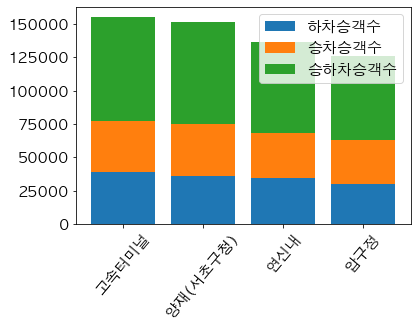

<Figure size 1440x360 with 0 Axes>

In [27]:
plt.xticks(rotation = 50)
plt.bar(df1['역명'], df1['하차승객수'], label = '하차승객수')
plt.bar(df1['역명'], df1['승차승객수'], bottom = df1['하차승객수'], label = '승차승객수')
plt.bar(df1['역명'], df1['승하차승객수'],bottom=df1['승차승객수'] + df1['하차승객수'],label = '승하차승객수')
plt.legend()
plt.figure(figsize = (20,5))
plt.show()

In [28]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.size'] = 15 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False #한글폰트 사용시, 마이너스 글자가 꺠지는 현상을 방지

In [29]:
df1 = pd.read_excel('line3.xlsx')
df1

,역명,하차승객수,승차승객수,승하차승객수
0,고속터미널,39037,38442,77479
1,양재(서초구청),36440,38573,76366
2,연신내,34856,33369,68225
3,압구정,30455,32488,62943


Text(0, 0.5, '승차승객수')

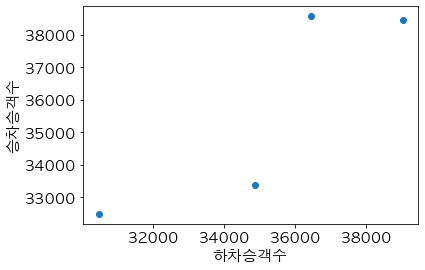

In [32]:
plt.scatter(df1['하차승객수'], df1['승차승객수'])
plt.xlabel('하차승객수')
plt.ylabel('승차승객수')

In [33]:
import numpy as np
sizes = np.random.rand(4) * 1000 # 4개의 역
sizes

array([861.54088669, 134.26796797, 623.39362126, 986.45831852])

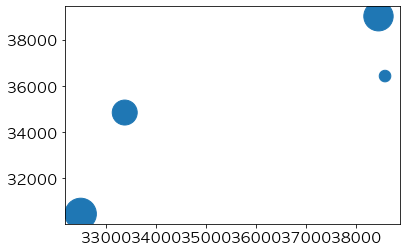

In [34]:
plt.scatter(df1['승차승객수'], df1['하차승객수'], s=sizes)
plt.xlabel = ('승차승객수')
plt.ylabel = ('하차승객수')

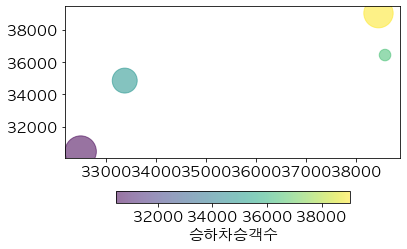

In [51]:
plt.scatter(df1['승차승객수'], df1['하차승객수'], s=sizes, c=df1['하차승객수'], cmap = 'viridis', alpha= 0.55)
plt.xlabel = ('하차승객수')
plt.ylabel = ('승차승객수')
plt.colorbar(label= '승하차승객수', shrink =0.7, orientation = 'horizontal')